# Module 2: Text into Data: Importing a Text

* DS 5001: Exploratory Text Analytics
* Raf Alvarado

# Set Up

In [2]:
import pandas as pd

In [3]:
epub_file = "../MOD01--SetUp/pg105.txt"
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

# Import file into a dataframe

In [4]:
epub = open(epub_file, 'r', encoding='utf-8-sig').readlines()

In [5]:
df = pd.DataFrame(epub, columns=['line_str'])

In [6]:
df.index.name = 'line_num'

In [7]:
df.line_str = df.line_str.str.strip()

In [8]:
df.sample(10)

,line_str
line_num,
6598,"concealments with me. It was curious, that ha..."
2483,"liking Louisa as well as Henrietta, it is nons..."
6518,"tone of cordiality, ""I beg your pardon for the..."
2066,But they have a great many to provide for; and...
3277,"moreover, how the Giaour was to be pronounced,..."
2653,accepting must be the word) of two young women...
5938,"you at the time."""
1849,"indifferent, if indifference could exist under..."
791,"brother, who being made commander in consequen..."


# Extract title of work from first line

In [9]:
title = df.loc[0].line_str.replace('The Project Gutenberg EBook of ', '')
df['title'] = title

In [10]:
print(title)

Persuasion, by Jane Austen


In [11]:
df.head()

,line_str,title
line_num,,
0,"The Project Gutenberg EBook of Persuasion, by ...","Persuasion, by Jane Austen"
1,,"Persuasion, by Jane Austen"
2,This eBook is for the use of anyone anywhere a...,"Persuasion, by Jane Austen"
3,almost no restrictions whatsoever. You may co...,"Persuasion, by Jane Austen"
4,re-use it under the terms of the Project Guten...,"Persuasion, by Jane Austen"


# Remove Gutenberg's front and back matter

In [12]:
a = df.line_str.str.match(r"\*\*\*\s*START OF (THE|THIS) PROJECT")
b = df.line_str.str.match(r"\*\*\*\s*END OF (THE|THIS) PROJECT")

In [13]:
an = df.loc[a].index[0]
bn = df.loc[b].index[0]

In [14]:
df = df.loc[an + 1 : bn - 2]

In [15]:
df

,line_str,title
line_num,,
19,,"Persuasion, by Jane Austen"
20,,"Persuasion, by Jane Austen"
21,,"Persuasion, by Jane Austen"
22,,"Persuasion, by Jane Austen"
23,Produced by Sharon Partridge and Martin Ward. ...,"Persuasion, by Jane Austen"
24,by Al Haines.,"Persuasion, by Jane Austen"
25,,"Persuasion, by Jane Austen"
26,,"Persuasion, by Jane Austen"
27,,"Persuasion, by Jane Austen"


# Chunk by chapter

## Find all chapter headers

In [16]:
chap_lines = df.line_str.str.match(r"^\s*(chapter|letter)\s+(\d+)", case=False)

In [17]:
df.loc[chap_lines]

,line_str,title
line_num,,
47,Chapter 1,"Persuasion, by Jane Austen"
306,Chapter 2,"Persuasion, by Jane Austen"
500,Chapter 3,"Persuasion, by Jane Austen"
786,Chapter 4,"Persuasion, by Jane Austen"
959,Chapter 5,"Persuasion, by Jane Austen"
1297,Chapter 6,"Persuasion, by Jane Austen"
1657,Chapter 7,"Persuasion, by Jane Austen"
1992,Chapter 8,"Persuasion, by Jane Austen"
2346,Chapter 9,"Persuasion, by Jane Austen"


## Assign numbers to chapters

In [18]:
chap_nums = [i+1 for i in range(df.loc[chap_lines].shape[0])]

In [19]:
df.loc[chap_lines, 'chap_num'] = chap_nums

In [20]:
# df

## Forward-fill chapter numbers to following text lines

In [21]:
df.chap_num = df.chap_num.ffill()

In [22]:
# df.head(100)

## Clean up

In [23]:
df = df.loc[~df.chap_num.isna()] # Remove chapter heading lines
df = df.loc[~chap_lines] # Remove everything before Chapter 1
df.chap_num = df.chap_num.astype('int') # Convert chap_num from float to int

In [24]:
df.sample(10)

,line_str,title,chap_num
line_num,,,
2104,"Four-and-twenty hours later, and I should only...","Persuasion, by Jane Austen",8
557,,"Persuasion, by Jane Austen",3
100,to them he must have owed a wife of very super...,"Persuasion, by Jane Austen",1
6156,"dared, I would breathe my wishes that the name...","Persuasion, by Jane Austen",20
4608,could not be so near without wishing to know t...,"Persuasion, by Jane Austen",15
7343,"really was Mr Elliot, which she had never beli...","Persuasion, by Jane Austen",22
7607,self-occupied to hear.,"Persuasion, by Jane Austen",23
3163,"country, and the retirement of Lyme in the win...","Persuasion, by Jane Austen",11
8282,,"Persuasion, by Jane Austen",24


## Group by chapter num and reset dataframe 

In [25]:
df = df.groupby(OHCO[:1]).line_str.apply(lambda x: '\n'.join(x)).to_frame() # Make big string

In [26]:
df.head()

,line_str
chap_num,
1,"\n\nSir Walter Elliot, of Kellynch Hall, in So..."
2,"\n\nMr Shepherd, a civil, cautious lawyer, who..."
3,"\n\n""I must take leave to observe, Sir Walter,..."
4,"\n\nHe was not Mr Wentworth, the former curate..."
5,\n\nOn the morning appointed for Admiral and M...


# Split into paragraphs 

In [27]:
df = df['line_str'].str.split(r'\n\n+', expand=True).stack()\
    .to_frame().rename(columns={0:'para_str'})

In [28]:
df.head()

para_str
chap_num                                                     
1        0                                                   
         1  Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                          "ELLIOT OF KELLYNCH HALL.
         3  "Walter Elliot, born March 1, 1760, married, J...
         4  Precisely such had the paragraph originally st...

In [29]:
df.index.names = OHCO[:2]

In [30]:
df.head()

para_str
chap_num para_num                                                   
1        0                                                          
         1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 "ELLIOT OF KELLYNCH HALL.
         3         "Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...

In [31]:
df['para_str'] = df['para_str'].str.replace(r'\n', ' ').str.strip()
df = df[~df['para_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [32]:
df.head()

para_str
chap_num para_num                                                   
1        1         Sir Walter Elliot, of Kellynch Hall, in Somers...
         2                                 "ELLIOT OF KELLYNCH HALL.
         3         "Walter Elliot, born March 1, 1760, married, J...
         4         Precisely such had the paragraph originally st...
         5         Then followed the history and rise of the anci...

# Split into sentences

In [33]:
df = df['para_str'].str.split(r'[.?!;]', expand=True).stack()\
    .to_frame().rename(columns={0:'sent_str'})

In [34]:
df.index.names = OHCO[:3]

In [35]:
df = df[~df['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs

In [36]:
df.head()

sent_str
chap_num para_num sent_num                                                   
1        1        0         Sir Walter Elliot, of Kellynch Hall, in Somers...
                  1          there he found occupation for an idle hour, a...
                  2          there his faculties were roused into admirati...
                  3          there any unwelcome sensations, arising from ...
                  4          and there, if every other leaf were powerless...

# Split into tokens

In [37]:
df = df['sent_str'].str.split(r'\s+', expand=True).stack()\
    .to_frame().rename(columns={0:'token_str'})

In [38]:
df.index.names = OHCO[:4]

In [39]:
df.head()

token_str
chap_num para_num sent_num token_num          
1        1        0        0               Sir
                           1            Walter
                           2           Elliot,
                           3                of
                           4          Kellynch

# Gathering by Content Object

In [40]:
sents = df.groupby(OHCO[:3]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
paras = df.groupby(OHCO[:2]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})
chaps = df.groupby(OHCO[:1]).token_str.apply(lambda x: ' '.join(x)).to_frame().rename(columns={'token_str':'content'})

In [41]:
def gather(ohco_level):
    return df.groupby(OHCO[:ohco_level]).token_str\
        .apply(lambda x: ' '.join(x))\
        .to_frame()\
        .rename(columns={'token_str':'content'})

In [42]:
sents.sample(10)

,,,content
chap_num,para_num,sent_num,
6,9,7,""" And on Mrs Musgrove's side, it was, ""I make ..."
3,28,7,farmer's man breaking into his orchard
11,15,3,"The dinner, already ordered at the inn, was a..."
23,60,2,She had never been supplanted
5,25,5,He said he should not stay out long
21,82,2,Mr Elliot's having any views on me will not i...
6,9,12,"but I just give you this hint, that you may b..."
5,22,2,I am so ill I can hardly speak
23,63,3,"To a degree, I could contradict this instantly"


In [43]:
# sents2 = sents.reset_index(drop=True)

In [44]:
df.token_str.str.len().plot.hist()

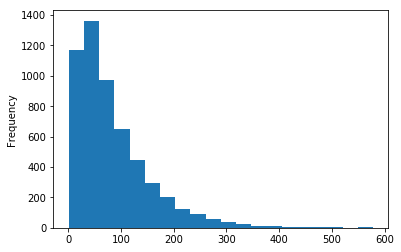

In [45]:
sents.content.str.len().plot.hist(bins=20)

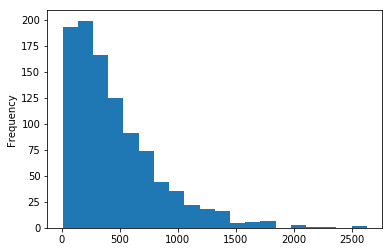

In [46]:
paras.content.str.len().plot.hist(bins=20)

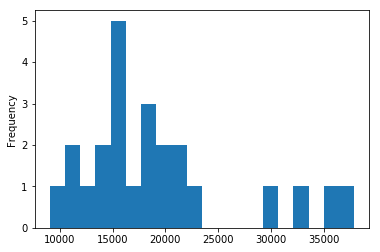

In [47]:
chaps.content.str.len().plot.hist(bins=20)

# Save work to CSV

In [48]:
df.to_csv('austen-persuasion.csv')